Epoch: 100; Error: 8.28074396775963;
Epoch: 200; Error: 8.10539171192785;
Epoch: 300; Error: 8.032875633069342;
Epoch: 400; Error: 7.589633240779492;
Epoch: 500; Error: 0.09748508604439163;
Epoch: 600; Error: 0.057638396090051496;
Epoch: 700; Error: 0.056760217362104536;
Epoch: 800; Error: 0.11906818120211331;
Epoch: 900; Error: 0.11329722608963383;
Epoch: 1000; Error: 0.06919895951012357;
Epoch: 1100; Error: 0.04384948773146877;
Epoch: 1200; Error: 0.030712826181481627;
Epoch: 1300; Error: 0.0298890439110752;
Epoch: 1400; Error: 0.03140678857032342;
Epoch: 1500; Error: 0.02210484645324672;
Epoch: 1600; Error: 0.021218871523170188;
Epoch: 1700; Error: 0.01947952089373889;
Epoch: 1800; Error: 0.017561278083455926;
Epoch: 1900; Error: 0.016578345889514418;
Epoch: 2000; Error: 0.015337548063783072;
The maximum number of train epochs is reached


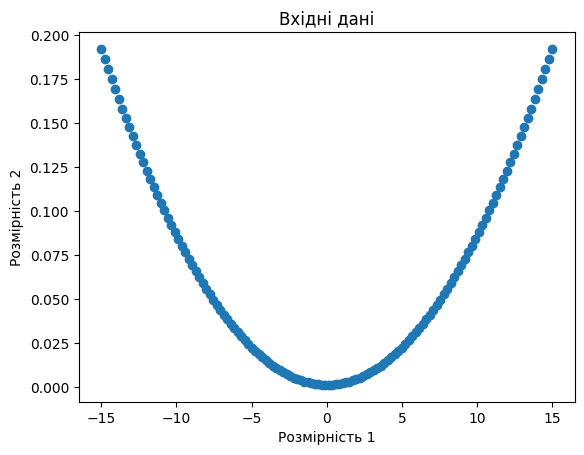

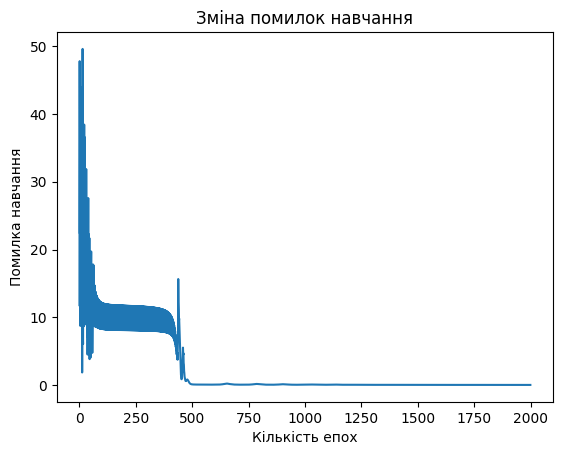

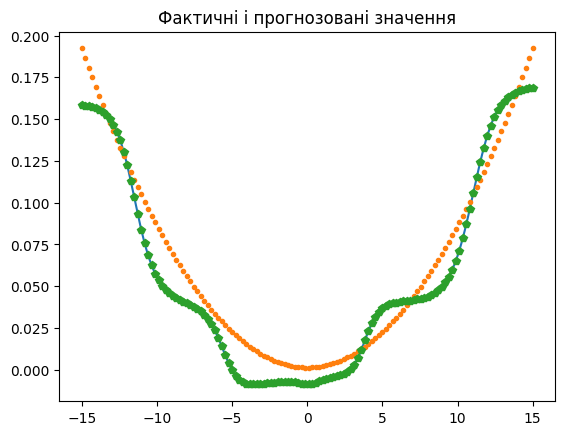

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import neurolab as nl

min_val = -15
max_val = 15
num_points = 130
x = np.linspace(min_val, max_val, num_points)
y = 5 * np.square(x) + 8
y /= np.linalg.norm(y)
data = x.reshape(num_points, 1)
labels = y.reshape(num_points, 1)

plt.figure()
plt.scatter(data, labels)
plt.xlabel("Розмірність 1")
plt.ylabel("Розмірність 2")
plt.title("Вхідні дані")

nn = nl.net.newff([[min_val, max_val]], [7, 7, 1])
nn.trainf = nl.train.train_gd
error_progress = nn.train(data, labels, epochs=2000, show=100, goal=0.01)
output = nn.sim(data)
y_pred = output.reshape(num_points)

plt.figure()
plt.plot(error_progress)
plt.xlabel("Кількість епох")
plt.ylabel("Помилка навчання")
plt.title("Зміна помилок навчання")

x_dense = np.linspace(min_val, max_val, num_points * 2)
y_dense_pred = nn.sim(x_dense.reshape(x_dense.size, 1)).reshape(x_dense.size)

plt.figure()
plt.plot(x_dense, y_dense_pred, "-", x, y, ".", x, y_pred, "p")
plt.title("Фактичні і прогнозовані значення")
plt.show()